In [1]:
import sympy as sym
%matplotlib inline
sym.init_printing()
from sympy import oo

import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend


def logx_plot(Hw, wrange, **kwargs):
    p = sym.plot(Hw, wrange, **kwargs)
    backend = MatplotlibBackend(p)
    backend.process_series()
    backend.ax.spines['left'].set_position(('axes', 0))
    backend.ax.spines['bottom'].set_position(('axes', 0))
    plt.xscale('log')
    plt.grid(which='both')
    return p

def db(x):
    'compute dB value'
    return 20 * sym.log(sym.Abs(x), 10)


def pole_zero_plot(poles, zeros, ax=None):
    mR = -2 #  valor inicial para minimo real
    MR = 2  #  valor inicial para maximo real
    mI = -2 #  valor inicial para minimo imaginario
    MI = 2  #  valor inicial para maximo imaginario
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
        if complex(pole).real < mR:
            mR = complex(pole).real
        if complex(pole).real > MR:
            MR = complex(pole).real
        if complex(pole).imag < mI:
            mI = complex(pole).imag
        if complex(pole).imag > MI:
            MI = complex(pole).imag
            
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
        if complex(zero).real < mR:
            mR = complex(zero).real
        if complex(zero).real > MR:
            MR = complex(zero).real
        if complex(zero).imag < mI:
            mI = complex(zero).imag
        if complex(zero).imag > MI:
            MI = complex(zero).imag

            
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.axis([mR*1.1, MR*1.1, mI*1.1, MI*1.1])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()



s = sym.symbols('s', complex=True)
w = sym.symbols('omega', real=True)
wc = sym.symbols('omega_c', real=True)

from sympy.physics.control.control_plots import bode_plot
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.lti import TransferFunction

In [2]:
sym.__version__

'1.11.1'

# Filtro de Butterworth

El [Filtro de Butterworth](https://es.wikipedia.org/wiki/Filtro_de_Butterworth) es uno de los filtros electrónicos más populares. La respuesta frecuencial es casi constante hasta la frecuencia de corte y después disminuye a razón de $20n \; dB/década$, donde $n$ es la cantidad de polos del filtro.

La función de transferencia del filtto $H(s)$ debe cumplir que:

- Las $2N-1$ primeras derivadas de $| H ( \omega ) |^2$ sean cero para $\omega = 0 $  y $\omega =\infty$.
- Únicamente posee polos.

Así, el cuadrado de la magnitud de la función de transferencia, para el filtro paso bajo con frecuencia de corte $\omega_c$, de orden $N$, de ganancia unitaria en la banda de paso, con es: 

$$|H(\omega)|^2= \frac{1}{1+(\omega / \omega_c)^{2N}} = (1+(\omega / \omega_c)^{2N})^{-1} $$


$$\frac{d(|H(\omega)|^2)}{d\omega} = -(1+(\omega / \omega_c)^{2N})^{-2}\cdot 2N \cdot (\omega / \omega_c)^{2N-1} \cdot \frac{1}{\omega_c}$$

$$\frac{d(|H(\omega)|^2)}{d\omega} = -\frac{  (\omega / \omega_c)^{2N-1}}{(1+(\omega / \omega_c)^{2N})^{2}}\cdot \frac{2N}{\omega_c}$$

La función de transferencia para el filtro Butterworth con $\omega_c = 1$ es de la forma:

$$H(s) = \frac{1}{Polinomio\;Butterworth}$$

| Polinomio Butterworth                | N |
|:------------------------------------:|--|
| $s+1$                                | 1|
| $s^2 + 1.4142s + 1$                  |2|
| $(s+1)(s^2 + s + 1)$                 |3|
| $(s^2+0.7654s+1)(s^2+1.8478s+1)$     |4|

Hay un polinomio para valor de $N$ determinado.

**Ejemplo**

Diseñe un filtro paso-bajo Butterworth de orden 3 con frecuencia de corte $\omega_c= 300\frac{rad}{s}$

El polinomio asociado es $(s+1)(s^2+s+1)$, por lo que la función de transferencia con frecuencia normalizada es:

$$\frac{1}{\left(s+1\right)\left(s^2+s+1\right)}$$

La función de transferencia del filtro buscado es:

$$\frac{1}{\left(\frac{s}{\omega_c}+1\right)\left(\left(\frac{s}{\omega_c}\right)^2+\frac{s}{\omega_c}+1\right)}$$

**Filtro normalizado**

In [3]:
H = (1 /((s+1)*(s**2 + s + 1))).subs({s:s/wc}).simplify().expand().subs({wc:300})
H

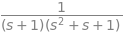

In [20]:
H_norm = TransferFunction(1,((s)+1)*((s)**2+(s)+1),s)
""" H_norm = TransferFunction(1,
                          ((s)+1)*((s)**2+0.618*(s)+1)*((s)**2+1.618*(s)+1),
                          s)
"""
H_norm

Respuesta en frecuencia del filtro normalizado.

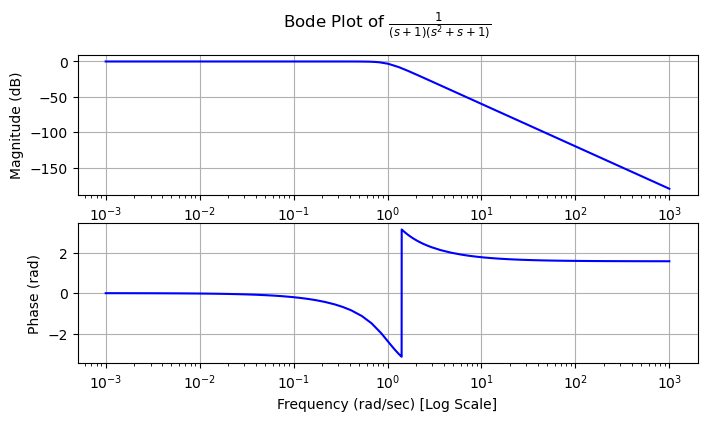

In [21]:
plt.rcParams['figure.figsize'] = 8,4

bode_plot(H_norm,initial_exp = -3,final_exp=3) 

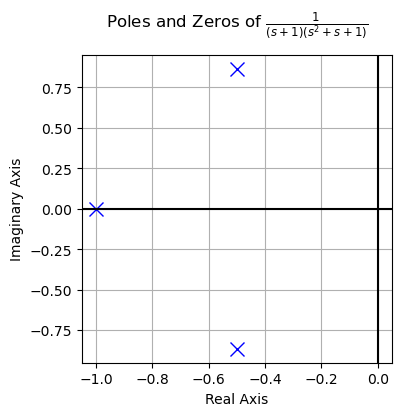

In [22]:
plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(H_norm)

**Filtro con frecuencia de corte**

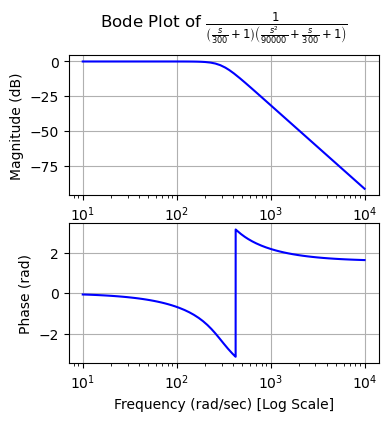

In [24]:
H300 = TransferFunction(1,((s/300)+1)*((s/300)**2+(s/300)+1),s)
"""H300 = TransferFunction(1,
                          ((s/900)+1)*((s/900)**2+0.618*(s/900)+1)*((s/900)**2+1.618*(s/900)+1),
                          s)"""
bode_plot(H300,initial_exp=1,final_exp=4)

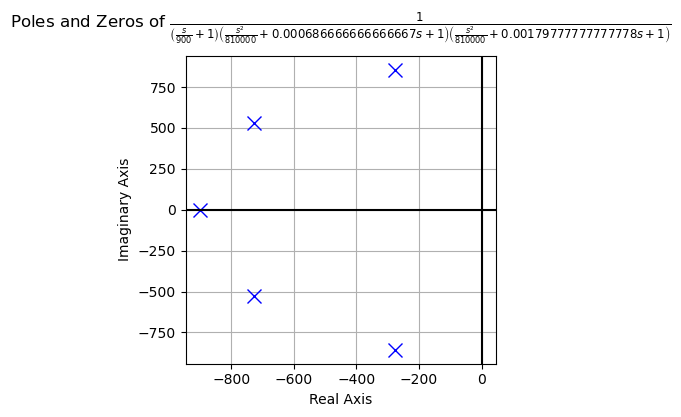

In [8]:
plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(H300)

#### ¿Qué efectos identifica en el escalamiento de frecuencia realizado?

------------

El método de diseño se soporta en la transformada de Laplace y por ende corresponde a un sistema de tiempo continuo que puede implementarse con amplificadores operacionales en configuración [Sallen Key](https://es.wikipedia.org/wiki/Filtro_de_Sallen-Key).

![Butterworth-Circ.png](figuras/Butterworth-Circ.png)

--------------

La estrategia de diseño expuesta permite obtener un filtro paso-bajo $H_{pb,N}(s)$. Para obtener un filtro paso-alto $H_{pa,N}(s)$ puede partirse de $H_{pb,N}(s)$.

$$H_{pa,N}(s) = s^N H_{pb,N}(s)$$

A continuación la respuesta del filtro paso-alto normalizado.

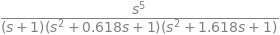

In [9]:
Ha_norm = TransferFunction(s**5,
                          ((s)+1)*((s)**2+0.618*(s)+1)*((s)**2+1.618*(s)+1),
                          s)
Ha_norm

Respuesta en frecuencia del filtro paso-alto normalizado.

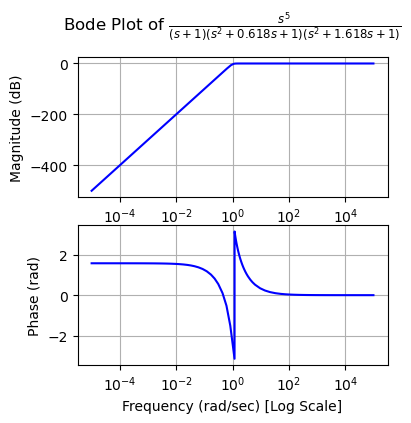

In [10]:
bode_plot(Ha_norm)

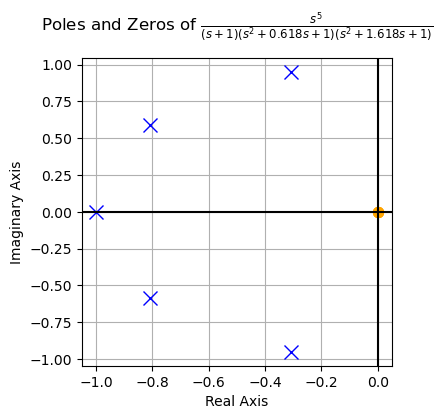

In [11]:
plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(Ha_norm)

Diseñe un filtro paso-alto Butterworth de orden 3 con frecuencia de corte $\omega_c= 200\frac{rad}{s}$

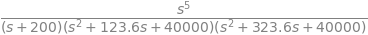

In [12]:
# Escriba su código
Ha_200 = TransferFunction((s/200)**5,
                          ((s/200)+1)*((s/200)**2+0.618*(s/200)+1)*((s/200)**2+1.618*(s/200)+1),
                          s)
Ha_200.simplify()

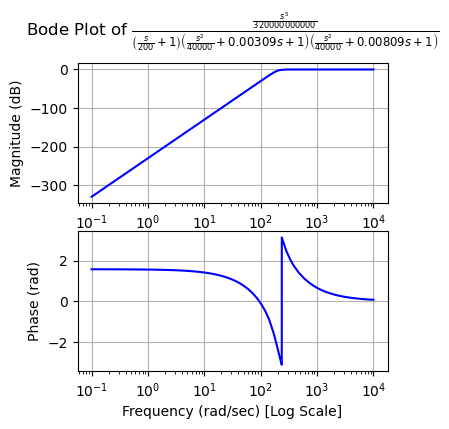

In [13]:
bode_plot(Ha_200,initial_exp=-1,final_exp=4)

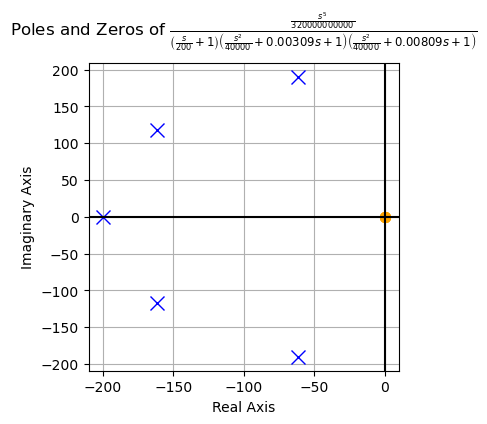

In [14]:
pole_zero_plot(Ha_200)

------------------

¿Qué ocurre si se conectan un filtro paso-alto y uno paso-bajo en serie?

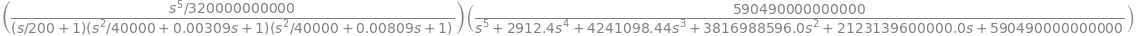

In [15]:
H_res = Ha_200*H300.simplify().expand()
H_res

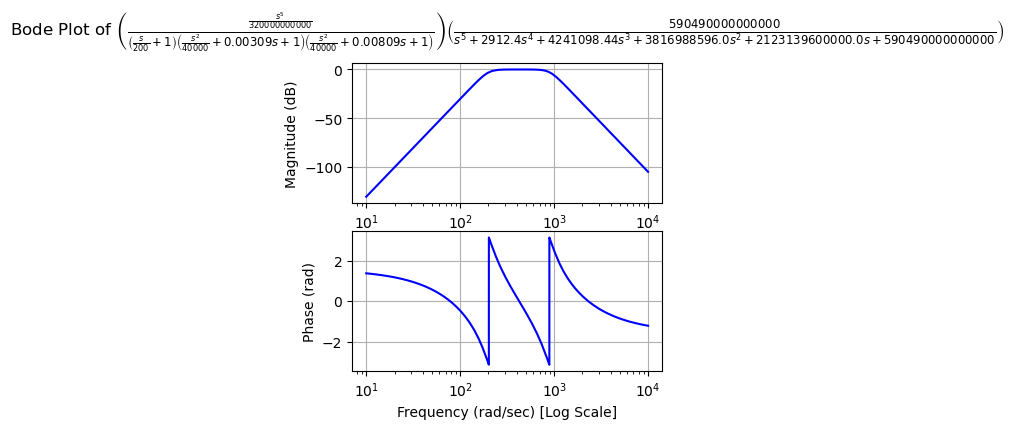

In [16]:
# Escriba su código
bode_plot(H_res,initial_exp=1,final_exp=4,show=False);

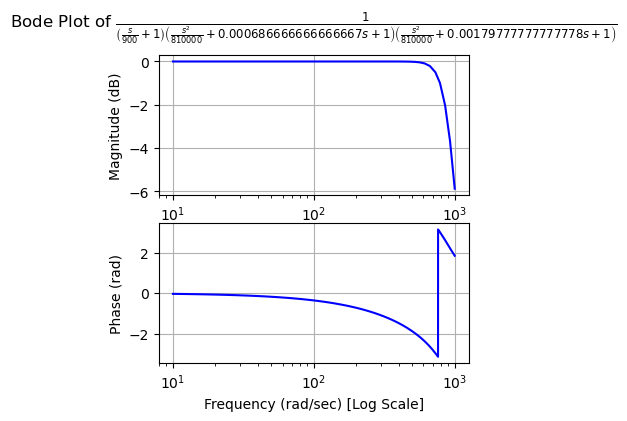

In [17]:
bode_plot(H300,initial_exp=1,final_exp=3,show=False);

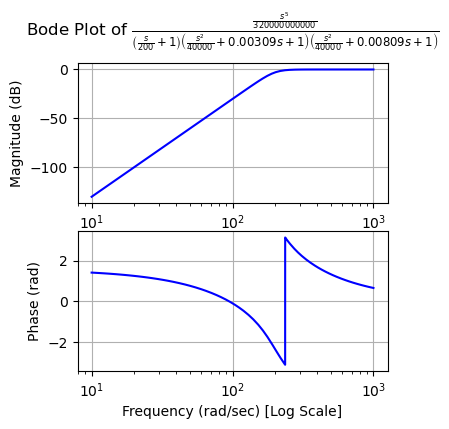

In [18]:
bode_plot(Ha_200,initial_exp=1,final_exp=3,show=False);

## Ejercicio

Diseñe un filtro de orden 6 que deje pasar solamente la voz de una cantante con registro soprano.